<a href="https://colab.research.google.com/github/slegro97/app-pocalypse/blob/main/App_pocalypse_Survivability_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries and Data

In [ ]:
%cd /content/drive/MyDrive/PythonProjects/Statistics with Python/Regression Analysis/Capstone Project_ Surviving the App-pocalypse

/content/drive/MyDrive/PythonProjects/Statistics with Python/Regression Analysis/Capstone Project_ Surviving the App-pocalypse


In [ ]:
!pip install lifelines

In [ ]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as sp
from lifelines import CoxPHFitter, KaplanMeierFitter
from sklearn.model_selection import train_test_split
from lifelines.utils import concordance_index

In [ ]:
# Data
df = pd.read_csv('googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# Data Cleaning and Preparation

In [ ]:
# DF info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
# Drop unnecessary columns columns
df = df.drop(columns=['App', 'Current Ver', 'Android Ver'])

print(df.head())

         Category  Rating Reviews  Size     Installs  Type Price  \
0  ART_AND_DESIGN     4.1     159   19M      10,000+  Free     0   
1  ART_AND_DESIGN     3.9     967   14M     500,000+  Free     0   
2  ART_AND_DESIGN     4.7   87510  8.7M   5,000,000+  Free     0   
3  ART_AND_DESIGN     4.5  215644   25M  50,000,000+  Free     0   
4  ART_AND_DESIGN     4.3     967  2.8M     100,000+  Free     0   

  Content Rating                     Genres      Last Updated  
0       Everyone               Art & Design   January 7, 2018  
1       Everyone  Art & Design;Pretend Play  January 15, 2018  
2       Everyone               Art & Design    August 1, 2018  
3           Teen               Art & Design      June 8, 2018  
4       Everyone    Art & Design;Creativity     June 20, 2018  


In [ ]:
# DF info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        10841 non-null  object 
 1   Rating          9367 non-null   float64
 2   Reviews         10841 non-null  object 
 3   Size            10841 non-null  object 
 4   Installs        10841 non-null  object 
 5   Type            10840 non-null  object 
 6   Price           10841 non-null  object 
 7   Content Rating  10840 non-null  object 
 8   Genres          10841 non-null  object 
 9   Last Updated    10841 non-null  object 
dtypes: float64(1), object(9)
memory usage: 847.1+ KB


In [ ]:
# Clean 'Category' variable
df['Category'].value_counts()

,count
Category,
FAMILY,1972
GAME,1144
TOOLS,843
MEDICAL,463
BUSINESS,460
PRODUCTIVITY,424
PERSONALIZATION,392
COMMUNICATION,387
SPORTS,384


In [ ]:
# Remove row with unusual value '1.9'
df = df[df['Category'] != '1.9']

In [ ]:
# Convert Reviews to numeric
df['Reviews'] = pd.to_numeric(df['Reviews'])

In [ ]:
# Clean 'Size' variable
def clean_size(size):
    if size == 'Varies with device':
        return np.nan
    elif 'M' in size:
        return float(size.replace('M', '').strip())  # Convert to float (in MB)
    elif 'k' in size:
        return float(size.replace('k', '').strip()) / 1024  # Convert kB to MB
    else:
        return size  # Handle any unexpected formats

# Apply the cleaning function
df['Size'] = df['Size'].apply(clean_size)

# Fill missing values with mean
df['Size'].fillna(df['Size'].mean(), inplace=True)

# Display the cleaned 'Size' column
print(df['Size'].head())

# Rename size column to indicate that size is measured in MB
df.rename(columns = {'Size':'Size_mb'}, inplace = True)

0    19.0
1    14.0
2     8.7
3    25.0
4     2.8
Name: Size, dtype: float64


In [ ]:
# Install Variable
df.Installs.value_counts()

,count
Installs,
"1,000,000+",1579
"10,000,000+",1252
"100,000+",1169
"10,000+",1054
"1,000+",907
"5,000,000+",752
100+,719
"500,000+",539
"50,000+",479


In [ ]:
# Function to clean the Installs column
def clean_installs(install_str):
    install_str = install_str.replace(',', '').replace('+', '').strip()  # Remove commas and plus signs
    return int(install_str) if install_str.isdigit() else None  # Convert to int or return None

# Apply the function to the Installs column
df['Installs'] = df['Installs'].apply(clean_installs)

# Display the cleaned Installs column
print(df['Installs'].head())

0       10000
1      500000
2     5000000
3    50000000
4      100000
Name: Installs, dtype: int64


In [ ]:
# Type Variable
df.Type.value_counts()

,count
Type,
Free,10039
Paid,800


In [ ]:
# Price Variable
df.Price.value_counts()

,count
Price,
0,10040
$0.99,148
$2.99,129
$1.99,73
$4.99,72
...,...
$19.90,1
$1.75,1
$14.00,1


In [ ]:
# Function to clean the Price column
def clean_price(price_str):
    if price_str.startswith('$'):
        return float(price_str.replace('$', '').strip())  # Remove '$' and convert to float
    return 0.0  # Return 0 for entries that do not start with '$'

# Apply the function to the Price column
df['Price'] = df['Price'].apply(clean_price)

# Display the cleaned Price column
print(df['Price'].head())

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Price, dtype: float64


In [ ]:
# Content Rating
df['Content Rating'].value_counts()

,count
Content Rating,
Everyone,8714
Teen,1208
Mature 17+,499
Everyone 10+,414
Adults only 18+,3
Unrated,2


In [ ]:
# Remove 'Adults only 18+' and 'Unrated' categories
df = df[~df['Content Rating'].isin(['Adults only 18+', 'Unrated'])]

# Display the cleaned Content Rating column
print(df['Content Rating'].value_counts())

Content Rating
Everyone        8714
Teen            1208
Mature 17+       499
Everyone 10+     414
Name: count, dtype: int64


In [ ]:
# Genres Variable
df.Genres.value_counts()

,count
Genres,
Tools,841
Entertainment,622
Education,549
Medical,463
Business,460
...,...
Parenting;Brain Games,1
Travel & Local;Action & Adventure,1
Lifestyle;Pretend Play,1


In [ ]:
# Too many categories, drop 'Genres'
df_selected_vars = df.drop(columns=['Genres'])

In [ ]:
# Preview finalized df
df_selected_vars.head()

,Category,Rating,Reviews,Size_mb,Installs,Type,Price,Content Rating,Last Updated
0,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,"January 7, 2018"
1,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,"January 15, 2018"
2,ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,"August 1, 2018"
3,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,"June 8, 2018"
4,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,"June 20, 2018"


# Dependent Variable

In [ ]:
# App churn: When the app has not been updated in the last 6 months
df_selected_vars['Last Updated']

,Last Updated
0,"January 7, 2018"
1,"January 15, 2018"
2,"August 1, 2018"
3,"June 8, 2018"
4,"June 20, 2018"
...,...
10836,"July 25, 2017"
10837,"July 6, 2018"
10838,"January 20, 2017"
10839,"January 19, 2015"


In [ ]:
# Convert the 'Last Updated' column to datetime
df_selected_vars['Last Updated'] = pd.to_datetime(df_selected_vars['Last Updated'], format='%B %d, %Y')

# Determine the earliest last updated date
earliest_date = df_selected_vars['Last Updated'].max()  # This gives you the most recent update date

# Calculate churn variable
df_selected_vars['Churn'] = (earliest_date - df_selected_vars['Last Updated']).dt.days > 180  # More than 180 days is 6 months
df_selected_vars['Churn'] = df_selected_vars['Churn'].astype(int)  # Convert boolean to int (1 for churn, 0 for not)

# Display the churn variable along with the Last Updated column
print(df_selected_vars[['Last Updated', 'Churn']].head())

  Last Updated  Churn
0   2018-01-07      1
1   2018-01-15      1
2   2018-08-01      0
3   2018-06-08      0
4   2018-06-20      0


In [ ]:
# Mean of the Churn variable
df_selected_vars.Churn.mean()

0.3574526995846793

In [ ]:
# Create days since last update column

# Create a new variable for the time duration in days since the last update
df_selected_vars['Days Since Last Update'] = (earliest_date - df_selected_vars['Last Updated']).dt.days

# Display the new variable along with the Last Updated column
print(df_selected_vars[['Last Updated', 'Days Since Last Update']].head())

  Last Updated  Days Since Last Update
0   2018-01-07                     213
1   2018-01-15                     205
2   2018-08-01                       7
3   2018-06-08                      61
4   2018-06-20                      49


In [ ]:
# Data
df_selected_vars.head()

,Category,Rating,Reviews,Size_mb,Installs,Type,Price,Content Rating,Last Updated,Churn,Days Since Last Update
0,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,2018-01-07,1,213
1,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,2018-01-15,1,205
2,ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,2018-08-01,0,7
3,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,2018-06-08,0,61
4,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,2018-06-20,0,49


In [ ]:
# Remove 'Last Updated'
df_final = df_selected_vars.drop(columns=['Last Updated'])

df_final.head()

,Category,Rating,Reviews,Size_mb,Installs,Type,Price,Content Rating,Churn,Days Since Last Update
0,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,1,213
1,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,1,205
2,ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,0,7
3,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,0,61
4,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,0,49


# KME Comparing Free vs. Paid apps

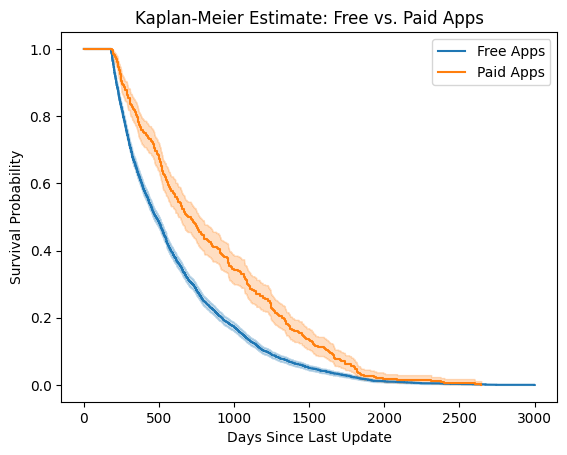

In [ ]:
# Initialize the Kaplan-Meier fitter
kmf = KaplanMeierFitter()

# Divide the data into rfee and paid apps
free_apps = df_final[df_final['Type'] == 'Free']
paid_apps = df_final[df_final['Type'] == 'Paid']

# Fit the model for free apps
kmf.fit(durations = free_apps['Days Since Last Update'],
        event_observed = free_apps['Churn'],
        label='Free Apps')
ax = kmf.plot()

# Fit the model for paid apps
kmf.fit(durations = paid_apps['Days Since Last Update'],
        event_observed = paid_apps['Churn'],
        label='Paid Apps')
kmf.plot(ax = ax)

# Plot the survival function
plt.title('Kaplan-Meier Estimate: Free vs. Paid Apps')
plt.xlabel('Days Since Last Update')
plt.ylabel('Survival Probability')
plt.legend()
plt.show()

# Cox PH Regression Model

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10835 entries, 0 to 10840
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Category                10835 non-null  object 
 1   Rating                  9362 non-null   float64
 2   Reviews                 10835 non-null  int64  
 3   Size_mb                 10835 non-null  float64
 4   Installs                10835 non-null  int64  
 5   Type                    10834 non-null  object 
 6   Price                   10835 non-null  float64
 7   Content Rating          10835 non-null  object 
 8   Churn                   10835 non-null  int64  
 9   Days Since Last Update  10835 non-null  int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 1.2+ MB


In [ ]:
# Remove NaN
df_final = df_final.dropna()

In [ ]:
# Transform categorical variables into dummy variables
df_final_dummies = pd.get_dummies(df_final,
                                  columns=['Category',
                                           'Type',
                                           'Content Rating'],
                                  drop_first=True)

# Split data into training and testing sets (80% training, 20% testing)
train, test = train_test_split(df_final_dummies,
                               test_size=0.2,
                               random_state=1502)

# Create an instance of the Cox Proportional Hazards fitter
cph = CoxPHFitter()

# Fit the CoxPH model to the training dataset
cph.fit(train, duration_col='Days Since Last Update', event_col='Churn')

# Print summary statistics of the fitted model
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 7489 total observations, 4966 right-censored observations>
             duration col = 'Days Since Last Update'
                event col = 'Churn'
      baseline estimation = breslow
   number of observations = 7489
number of events observed = 2523
   partial log-likelihood = -17104.45
         time fit was run = 2024-09-19 01:54:38 UTC

---
                               coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                            
Rating                         0.11       1.11       0.04             0.03             0.19                 1.03                 1.21
Reviews                       -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
Size_mb                        0.01       1.01       0.00             0.01             0.01                 1.01                 1.01
Installs                       0.00       1.00       0.00             0.00             0.00                 1.00                 1.00
Price                          0.00       1.00       0.00             0.00             0.01                 1.00                 1.01
Category_AUTO_AND_VEHICLES    -1.21       0.30       0.48            -2.16            -0.26                 0.12                 0.77
Category_BEAUTY               -0.26       0.77       0.51            -1.26             0.73                 0.28                 2.08
Category_BOOKS_AND_REFERENCE  -1.27       0.28       0.33            -1.91            -0.64                 0.15                 0.53
Category_BUSINESS             -1.15       0.32       0.32            -1.78            -0.52                 0.17                 0.60
Category_COMICS               -0.59       0.55       0.44            -1.45             0.26                 0.23                 1.30
Category_COMMUNICATION        -1.23       0.29       0.32            -1.86            -0.60                 0.16                 0.55
Category_DATING               -0.40       0.67       0.41            -1.20             0.41                 0.30                 1.50
Category_EDUCATION            -1.15       0.32       0.34            -1.82            -0.48                 0.16                 0.62
Category_ENTERTAINMENT        -0.84       0.43       0.44            -1.70             0.03                 0.18                 1.03
Category_EVENTS               -0.26       0.77       0.43            -1.10             0.57                 0.33                 1.77
Category_FAMILY               -1.33       0.26       0.31            -1.93            -0.73                 0.14                 0.48
Category_FINANCE              -1.00       0.37       0.33            -1.65            -0.35                 0.19                 0.70
Category_FOOD_AND_DRINK       -0.60       0.55       0.48            -1.55             0.35                 0.21                 1.41
Category_GAME                 -1.70       0.18       0.31            -2.31            -1.09                 0.10                 0.34
Category_HEALTH_AND_FITNESS   -1.31       0.27       0.33            -1.96            -0.65                 0.14                 0.52
Category_HOUSE_AND_HOME       -1.77       0.17       0.47            -2.68            -0.85                 0.07                 0.43
Category_LIBRARIES_AND_DEMO   -1.48       0.23       0.35            -2.16            -0.79                 0.12                 0.45
Category_LIFESTYLE            -1.24       0.29       0.32            -1.86            -0.62                 0.15                 0.54
Category_MAPS_AND_NAVIGATION  -1.06       0.35       0.36            -1.77            -0.35                 0.17                 0.71
Category_MEDICAL              -1.39       0.25       0.32            -2.02            -0.76                 0.13                 0.47
C

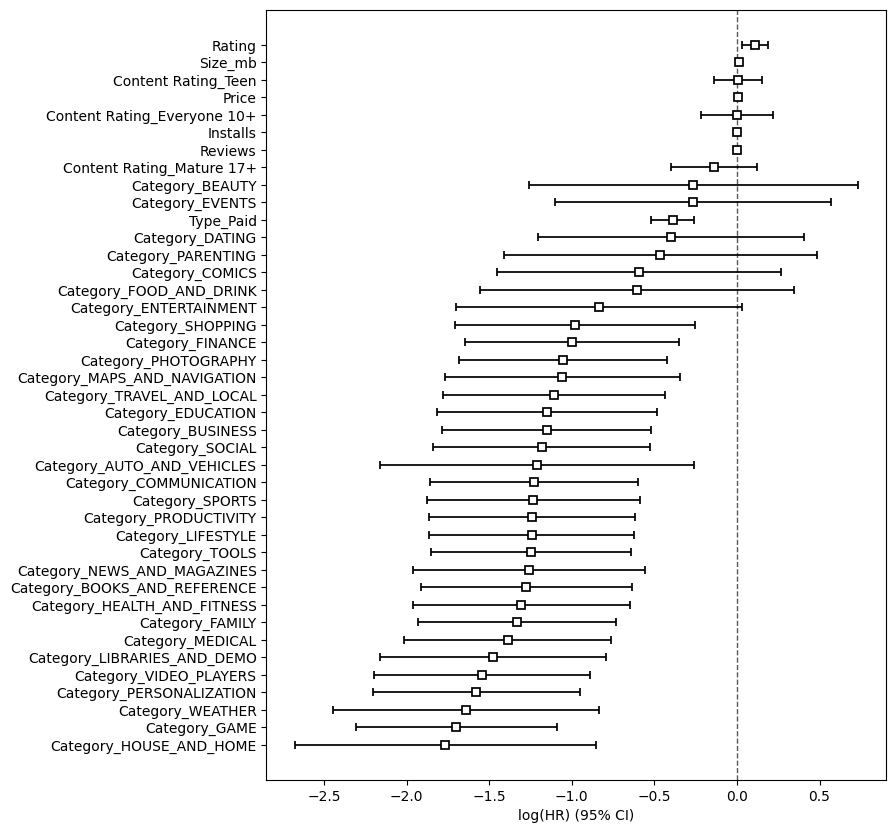

In [ ]:
# Plot the coefficients
plt.figure(figsize = (8,10))
cph.plot()
plt.show()

In [ ]:
# Assessing the model using the Concordance Index
c_index = concordance_index(test['Days Since Last Update'],
                            -cph.predict_partial_hazard(test),
                            test['Churn'])
print(f"Concordance Index on the Test Set: {c_index}")

Concordance Index on the Test Set: 0.6005515618747318


In [ ]:
# Check the proportional hazards assumption
cph.check_assumptions(train)

The ``p_value_threshold`` is set at 0.01. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 7489 total observations, 4966 right-censored observations>
         test_name = proportional_hazard_test

---
                                   test_statistic      p  -log2(p)
Category_AUTO_AND_VEHICLES   km              0.17   0.68      0.55
                             rank            0.17   0.68      0.55
Category_BEAUTY              km              0.25   0.62      0.70
                             rank            0.25   0.62      0.70
Category_BOOKS_AND_REFERENCE km              0.16   0.69      0.54
                             rank            0.16   0.69      0.54
Category_BUSINESS            km              0.93   0.33      1.58
                             rank            0.93   0.34      1.58
Category_COMICS              km              0.47   0.49      1.02
                             rank            0.47   0.49      1.02
Category_COMMUNICATION       km              0.33   0.57      0.82
                             rank            0.33   0.57      0.82
Category_DATING              km              0.06   0.80      0.32
                             rank            0.06   0.80      0.32
Category_EDUCATION           km              0.82   0.37      1.45
                             rank            0.82   0.37      1.45
Category_ENTERTAINMENT       km              3.30   0.07      3.86
                             rank            3.33   0.07      3.88
Category_EVENTS              km              0.02   0.88      0.19
                             rank            0.02   0.88      0.19
Category_FAMILY              km              0.66   0.42      1.27
                             rank            0.66   0.41      1.27
Category_FINANCE             km              3.08   0.08      3.66
                             rank            3.07   0.08      3.65
Category_FOOD_AND_DRINK      km              0.02   0.90      0.15
                             rank            0.02   0.90      0.16
Category_GAME                km              0.78   0.38      1.40
                             rank            0.78   0.38      1.40
Category_HEALTH_AND_FITNESS  km              2.26   0.13      2.91
                             rank            2.26   0.13      2.92
Category_HOUSE_AND_HOME      km              0.20   0.66      0.60
                             rank            0.20   0.66      0.60
Category_LIBRARIES_AND_DEMO  km              0.00   0.99      0.02
                             rank            0.00   0.97      0.04
Category_LIFESTYLE           km              0.19   0.66      0.60
                             rank            0.19   0.66      0.60
Category_MAPS_AND_NAVIGATION km              2.94   0.09      3.54
                             rank            2.95   0.09      3.54
Category_MEDICAL             km              1.80   0.18      2.47
                             rank            1.80   0.18      2.47
Category_NEWS_AND_MAGAZINES  km              0.00   0.98      0.02
                             rank            0.00   0.98      0.02
Category_PARENTING           km              0.01   0.93      0.11
                             rank            0.01   0.93      0.11
Category_PERSONALIZATION     km              0.01   0.92      0.12
                             rank            0.01   0.92      0.12
Category_PHOTOGRAPHY         km              0.35   0.55      0.85
                             rank            0.35   0.55      0.85
Category_PRODUCTIVITY        km              0.48   0.49      1.03
                             rank            0.48   0.49      1.03
Category_SHOPPING            km              2.66   0.10      3.28
                             rank            2.66   0.10      3.28
Category_SOCIAL              km              0.34   0.56      0.84
                             rank            0.34   0.56      0.84
Category_SPORTS              km     



1. Variable 'Size_mb' failed the non-proportional test: p-value is 0.0008.

   Advice 1: the functional form of the variable 'Size_mb' might be incorrect. That is, there may be
non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the variable 'Size_mb' using pd.cut, and then specify it in
`strata=['Size_mb', ...]` in the call in `.fit`. See documentation in link [B] below.

   Advice 3: try adding an interaction term with your time variable. See documentation in link [C]
below.


2. Variable 'Installs' failed the non-proportional test: p-value is 0.0048.

   Advice 1: the functional form of the variable 'Installs' might be incorrect. That is, there may
be non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a functional for

[]

# Insights

1) Paid apps are more likely to get updated (survive), perhaps because developers are more invested due to the monetary value

2) The rating affects the app churn positively